In [1]:
# Import libraries
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

In [2]:
# Import data from excel files
df1 = pd.read_excel('Formative Assessment I_class_IV.xlsx');
df2 = pd.read_excel('Formative Assessment-2_class_IV.xlsx');
df3 = pd.read_excel('Half Yearly Exam_class_IV.xlsx');

# In df3, where the Full Mark is not 100, multuply the Full Mark, Pass Mark and Marks Secured by 100/Full Mark
df3.loc[df3['Full Mark']!=100, 'Pass Mark'] = df3['Pass Mark']*100/df3['Full Mark'];
df3.loc[df3['Full Mark']!=100, 'Marks Secured'] = df3['Marks Secured']*100/df3['Full Mark'];
df3.loc[df3['Full Mark']!=100, 'Full Mark'] = df3['Full Mark']*100/df3['Full Mark'];

# Merge the dataframes
df = pd.concat([df1, df2, df3], ignore_index=True);

# print the head
df.head()

,Academic session,Exam Name,Exam Mode,Subject Name,Subject Status,Full Mark,Pass Mark,Negative Percentage,Student Name,Class,Section,Roll No,Marks Secured,Result
0,2022-2023,Formative Assessment I,Offline,English I,Evaluating,25.0,7.0,0 %,Diksha Joshi,IV,A,1,15.5,Pass
1,2022-2023,Formative Assessment I,Offline,Social Science,Evaluating,25.0,7.0,0 %,Diksha Joshi,IV,A,1,13.0,Pass
2,2022-2023,Formative Assessment I,Offline,General Knowledge,Evaluating,25.0,7.0,0 %,Diksha Joshi,IV,A,1,13.0,Pass
3,2022-2023,Formative Assessment I,Offline,Science,Evaluating,25.0,7.0,0 %,Diksha Joshi,IV,A,1,6.0,Fail
4,2022-2023,Formative Assessment I,Offline,Hindi,Evaluating,25.0,7.0,0 %,Diksha Joshi,IV,A,1,17.5,Pass


In [3]:
# Print the number of cells with value 0 in marks secured column
print('Number of cells with value 0 in marks secured column: ', df[df['Marks Secured']==0].shape[0])

# Print the student names with value 0 in marks secured column
print('Student names with value 0 in marks secured column: ', df[df['Marks Secured']==0]['Student Name'].unique())

Number of cells with value 0 in marks secured column:  55
Student names with value 0 in marks secured column:  ['Sahil Dey' 'Elbina Saikia' 'Jyotisman Kalita' 'Kritartha Kashyap'
 'Trishna Sharma' 'Rishan Rohang' 'Debasish Tumung' 'Sahil Kr Ray'
 'Bhaskar Das' 'Rahish Hussain' 'Pranjit Kr.Mahato' 'Ankut Lalung'
 'Aparna  Lalung' 'Harsh Sharma' 'Aryan Lama' 'Darshana Bordoloi'
 'Priyanka Biswas']


In [4]:
# Get all the Subject names
subjects = df['Subject Name'].unique();

# Get all the students
students = df['Student Name'].unique();

# Get all the Exam names
exams = df['Exam Name'].unique();

In [5]:
# print the number of subjects
print('Number of Subjects: ', len(subjects));
# Print the subjects
print('Subjects: ', subjects);
# print the number of students
print('Number of Students: ', len(students));

# print the number of exams
print('Number of Exams: ', len(exams));

Number of Subjects:  10
Subjects:  ['English I' 'Social Science' 'General Knowledge' 'Science' 'Hindi'
 'Assamese' 'English II' 'Drawing' 'Computer' 'Maths']
Number of Students:  36
Number of Exams:  3


In [6]:
# Create a new dataframe for students data
df_new = pd.DataFrame(students, columns=['Student Name']);

# Loop through all the students
for student in students:
    # Find the first row of the student in the dataframe
    row = df.loc[df['Student Name'] == student].iloc[0];
    # Add the Class, Section, Roll No to the new dataframe
    df_new.loc[df_new['Student Name'] == student, 'Class'] = row['Class'];
    df_new.loc[df_new['Student Name'] == student, 'Section'] = row['Section'];
    df_new.loc[df_new['Student Name'] == student, 'Roll No'] = row['Roll No'];

df_new.head()

,Student Name,Class,Section,Roll No
0,Diksha Joshi,IV,A,1.0
1,Nabya Saha,IV,A,2.0
2,Disan Abang,IV,A,3.0
3,Manash Talukdar,IV,A,4.0
4,Sahil Dey,IV,A,6.0


In [7]:
# Add columns for each exam and subject
for exam in exams:
    for subject in subjects:
        df_new[exam + '_' + subject] = 0;
        df_new[exam + '_' + subject + '_total'] = 0;
        df_new[exam + '_' + subject + '_pass'] = 0;

df_new.head()

,Student Name,Class,Section,Roll No,Formative Assessment I_English I,Formative Assessment I_English I_total,Formative Assessment I_English I_pass,Formative Assessment I_Social Science,Formative Assessment I_Social Science_total,Formative Assessment I_Social Science_pass,...,Half Yearly Exam_English II_pass,Half Yearly Exam_Drawing,Half Yearly Exam_Drawing_total,Half Yearly Exam_Drawing_pass,Half Yearly Exam_Computer,Half Yearly Exam_Computer_total,Half Yearly Exam_Computer_pass,Half Yearly Exam_Maths,Half Yearly Exam_Maths_total,Half Yearly Exam_Maths_pass
0,Diksha Joshi,IV,A,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Nabya Saha,IV,A,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Disan Abang,IV,A,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Manash Talukdar,IV,A,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Sahil Dey,IV,A,6.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Add marks to the new dataframe
for student in students:
    for exam in exams:
        for subject in subjects:
            # full marks
            full_mark = df.loc[(df['Exam Name'] == exam) & (df['Subject Name'] == subject), 'Full Mark'].iloc[0];
            # pass marks
            pass_mark = df.loc[(df['Exam Name'] == exam) & (df['Subject Name'] == subject), 'Pass Mark'].iloc[0];
            # Check if the row of the student esist in the dataframe
            if df.loc[(df['Student Name'] == student) & (df['Exam Name'] == exam) & (df['Subject Name'] == subject)].empty:
                # If it doesn't exist, add 0 to the new dataframe
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject] = 0;
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject + '_total'] = full_mark;
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject + '_pass'] = pass_mark;
            else:
                # If it exists, get the row
                row = df.loc[(df['Student Name'] == student) & (df['Exam Name'] == exam) & (df['Subject Name'] == subject)].iloc[0];
                # Add the marks to the new dataframe
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject] = row['Marks Secured'];
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject + '_total'] = full_mark;
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject + '_pass'] = pass_mark;
df_new.head()

,Student Name,Class,Section,Roll No,Formative Assessment I_English I,Formative Assessment I_English I_total,Formative Assessment I_English I_pass,Formative Assessment I_Social Science,Formative Assessment I_Social Science_total,Formative Assessment I_Social Science_pass,...,Half Yearly Exam_English II_pass,Half Yearly Exam_Drawing,Half Yearly Exam_Drawing_total,Half Yearly Exam_Drawing_pass,Half Yearly Exam_Computer,Half Yearly Exam_Computer_total,Half Yearly Exam_Computer_pass,Half Yearly Exam_Maths,Half Yearly Exam_Maths_total,Half Yearly Exam_Maths_pass
0,Diksha Joshi,IV,A,1.0,15.5,25,7,13.0,25,7,...,30,74,100,30,36.0,100,30,60.5,100,30
1,Nabya Saha,IV,A,2.0,14.0,25,7,16.0,25,7,...,30,78,100,30,37.0,100,30,44.5,100,30
2,Disan Abang,IV,A,3.0,18.0,25,7,12.0,25,7,...,30,46,100,30,33.5,100,30,28.0,100,30
3,Manash Talukdar,IV,A,4.0,19.0,25,7,6.0,25,7,...,30,40,100,30,33.0,100,30,20.0,100,30
4,Sahil Dey,IV,A,6.0,1.5,25,7,5.0,25,7,...,30,46,100,30,30.0,100,30,26.0,100,30


In [9]:
# Add weightage column for each subject
for subject in subjects:
    df_new['Weightage ' + subject] = np.nan;

df_new.head()

/tmp/ipykernel_88989/1942589083.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new['Weightage ' + subject] = np.nan;


,Student Name,Class,Section,Roll No,Formative Assessment I_English I,Formative Assessment I_English I_total,Formative Assessment I_English I_pass,Formative Assessment I_Social Science,Formative Assessment I_Social Science_total,Formative Assessment I_Social Science_pass,...,Weightage English I,Weightage Social Science,Weightage General Knowledge,Weightage Science,Weightage Hindi,Weightage Assamese,Weightage English II,Weightage Drawing,Weightage Computer,Weightage Maths
0,Diksha Joshi,IV,A,1.0,15.5,25,7,13.0,25,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Nabya Saha,IV,A,2.0,14.0,25,7,16.0,25,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Disan Abang,IV,A,3.0,18.0,25,7,12.0,25,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Manash Talukdar,IV,A,4.0,19.0,25,7,6.0,25,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sahil Dey,IV,A,6.0,1.5,25,7,5.0,25,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Calculate the weightage for each subject by taking the 40% from FA1, 40% from FA2 and 80% from Half Yearly
for subject in subjects:
    df_new['Weightage ' + subject] = round(df_new['Formative Assessment I_' + subject] * 0.4 + df_new['Formative Assessment-2_' + subject] * 0.4 + df_new['Half Yearly Exam_' + subject] * 0.8, 2);
    # Calculate the full weightage for each subject by taking the 40% from FA1, 40% from FA2 and 80% from Half Yearly
    df_new['Weightage ' + subject + ' total'] = df_new['Formative Assessment I_' + subject + '_total'] * 0.4 + df_new['Formative Assessment-2_' + subject + '_total'] * 0.4 + df_new['Half Yearly Exam_' + subject + '_total'] * 0.8;

/tmp/ipykernel_88989/2845463436.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new['Weightage ' + subject + ' total'] = df_new['Formative Assessment I_' + subject + '_total'] * 0.4 + df_new['Formative Assessment-2_' + subject + '_total'] * 0.4 + df_new['Half Yearly Exam_' + subject + '_total'] * 0.8;


In [11]:
# Calculate the weightage result for each subject, pass if weightage is greater than 30% of the full weightage
for subject in subjects:
    # calculate the weightage result
    df_new['Result ' + subject] = np.where(df_new['Weightage ' + subject] >= df_new['Weightage ' + subject + ' total'] * 0.3, 'Pass', 'Fail');

/tmp/ipykernel_88989/717132809.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new['Result ' + subject] = np.where(df_new['Weightage ' + subject] >= df_new['Weightage ' + subject + ' total'] * 0.3, 'Pass', 'Fail');


In [12]:
# Add a total column for the weightage
df_new['Total Weightage'] = 0;

# Calculate the total weightage using a loop of all the subjects
for subject in subjects:
    df_new['Total Weightage'] += df_new['Weightage ' + subject];

df_new.head()

/tmp/ipykernel_88989/106921885.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new['Total Weightage'] = 0;


,Student Name,Class,Section,Roll No,Formative Assessment I_English I,Formative Assessment I_English I_total,Formative Assessment I_English I_pass,Formative Assessment I_Social Science,Formative Assessment I_Social Science_total,Formative Assessment I_Social Science_pass,...,Result Social Science,Result General Knowledge,Result Science,Result Hindi,Result Assamese,Result English II,Result Drawing,Result Computer,Result Maths,Total Weightage
0,Diksha Joshi,IV,A,1.0,15.5,25,7,13.0,25,7,...,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,561.42
1,Nabya Saha,IV,A,2.0,14.0,25,7,16.0,25,7,...,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,504.80
2,Disan Abang,IV,A,3.0,18.0,25,7,12.0,25,7,...,Pass,Pass,Pass,Fail,Fail,Pass,Pass,Pass,Fail,402.40
3,Manash Talukdar,IV,A,4.0,19.0,25,7,6.0,25,7,...,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Fail,429.40
4,Sahil Dey,IV,A,6.0,1.5,25,7,5.0,25,7,...,Fail,Fail,Fail,Fail,Pass,Fail,Pass,Pass,Fail,233.40


In [13]:
# Add a result column
df_new['Result'] = '';

# Function to add all weightage subject total
def add_total_weightage(row):
    total = 0;
    for subject in subjects:
        total += row['Weightage ' + subject + ' total'];
    return total;


# Add the total marks column
df_new['Total Marks'] = df_new.apply(add_total_weightage, axis=1);

# Calculate the percentage
df_new['Percentage'] = df_new['Total Weightage'] / df_new['Total Marks'] * 100;

# Pass if total weightage is greater than 30% of total full marks
df_new.loc[df_new['Total Weightage'] >= df_new['Total Marks'] * 0.3, 'Result'] = 'Pass';

# Fail if total weightage is less than 30% of total full marks
df_new.loc[df_new['Total Weightage'] < df_new['Total Marks'] * 0.3, 'Result'] = 'Fail';

/tmp/ipykernel_88989/19931101.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new['Result'] = '';


In [14]:
# Calculate the rank
df_new['Rank'] = df_new['Percentage'].rank(ascending=False);

In [15]:
# Print the first row
df_new.iloc[0]

Student Name                        Diksha Joshi
Class                                         IV
Section                                        A
Roll No                                      1.0
Formative Assessment I_English I            15.5
                                        ...     
Total Weightage                           561.42
Result                                      Pass
Total Marks                               1000.0
Percentage                                56.142
Rank                                         7.0
Name: 0, Length: 129, dtype: object

In [16]:
df_new

,Student Name,Class,Section,Roll No,Formative Assessment I_English I,Formative Assessment I_English I_total,Formative Assessment I_English I_pass,Formative Assessment I_Social Science,Formative Assessment I_Social Science_total,Formative Assessment I_Social Science_pass,...,Result Assamese,Result English II,Result Drawing,Result Computer,Result Maths,Total Weightage,Result,Total Marks,Percentage,Rank
0,Diksha Joshi,IV,A,1.0,15.5,25,7,13.0,25,7,...,Pass,Pass,Pass,Pass,Pass,561.42,Pass,1000.0,56.142,7.0
1,Nabya Saha,IV,A,2.0,14.0,25,7,16.0,25,7,...,Pass,Pass,Pass,Pass,Pass,504.80,Pass,1000.0,50.480,10.0
2,Disan Abang,IV,A,3.0,18.0,25,7,12.0,25,7,...,Fail,Pass,Pass,Pass,Fail,402.40,Pass,1000.0,40.240,17.0
3,Manash Talukdar,IV,A,4.0,19.0,25,7,6.0,25,7,...,Pass,Pass,Pass,Pass,Fail,429.40,Pass,1000.0,42.940,16.0
4,Sahil Dey,IV,A,6.0,1.5,25,7,5.0,25,7,...,Pass,Fail,Pass,Pass,Fail,233.40,Fail,1000.0,23.340,30.0
5,Pragyan Bhuyan,IV,A,7.0,21.5,25,7,21.5,25,7,...,Pass,Pass,Pass,Pass,Pass,559.40,Pass,1000.0,55.940,8.0
6,Kritartha Kakati,IV,A,8.0,23.5,25,7,23.5,25,7,...,Fail,Pass,Pass,Pass,Pass,620.20,Pass,1000.0,62.020,3.0
7,Harsita Kashyap,IV,A,9.0,21.5,25,7,23.0,25,7,...,Pass,Pass,Pass,Pass,Pass,855.60,Pass,1000.0,85.560,1.0
8,Khushi Jaiswal,IV,A,10.0,7.0,25,7,5.0,25,7,...,Fail,Pass,Pass,Fail,Fail,309.80,Pass,1000.0,30.980,24.0
9,Elbina Saikia,IV,A,11.0,0.0,25,7,4.0,25,7,...,Fail,Fail,Pass,Fail,Fail,181.80,Fail,1000.0,18.180,34.0


In [17]:
# Export the dataframe to excel
df_new.to_excel('Result.xlsx', index=False);

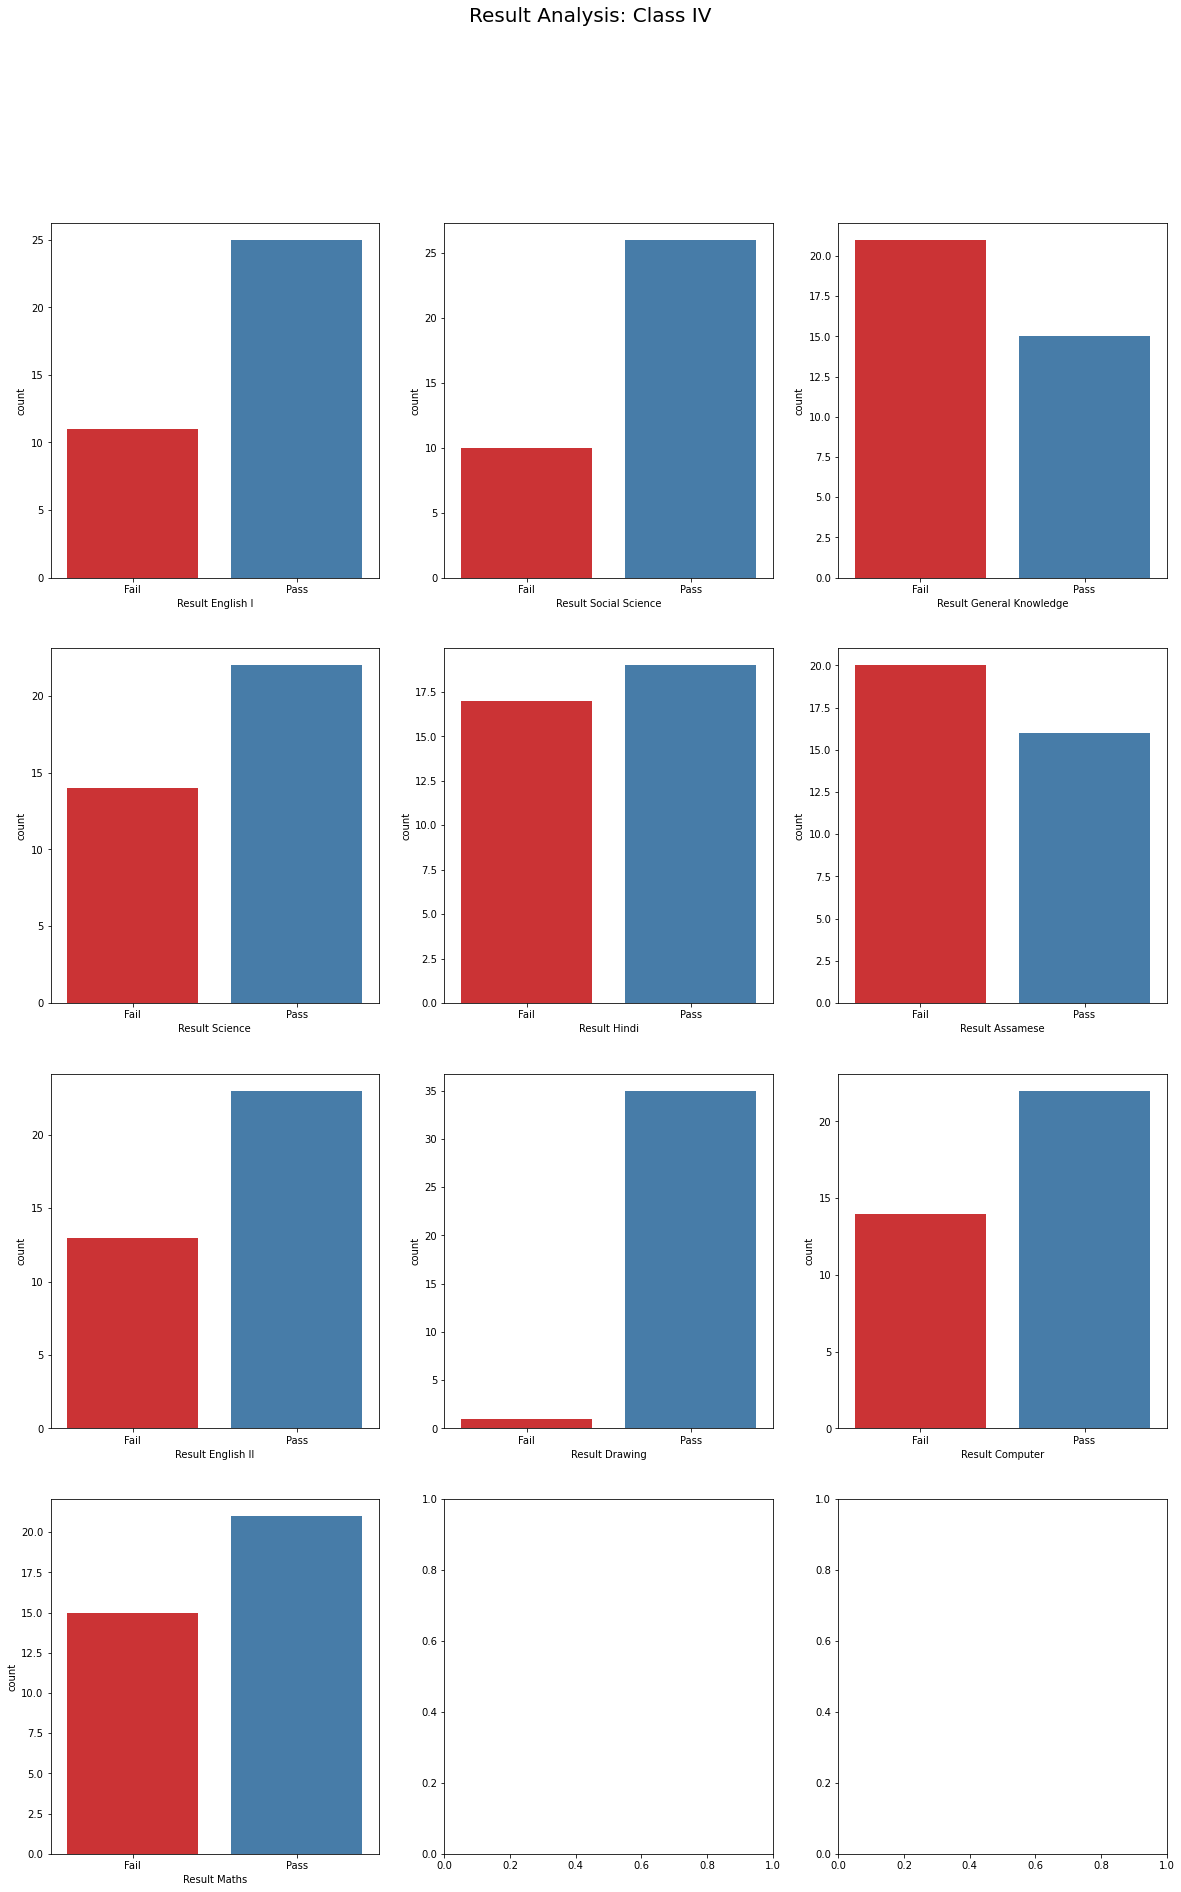

In [18]:
# Combine the charts in one figure
fig, axes = plt.subplots(4, 3, figsize=(20, 30));

# Set the title of the figure
fig.suptitle('Result Analysis: Class IV', fontsize=20);

for i, subject in enumerate(subjects):
    sns.countplot(x='Result ' + subject, data=df_new, palette='Set1', order=['Fail', 'Pass'], ax=axes[i // 3, i % 3]);
plt.show();